Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\apkar\Downloads\WA-Fn-UseC-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info() ###tells us about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape ##no of rows and coloumns

(1470, 35)

In [5]:
df.isna().sum() ###helps to find null values in our dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Statistical Analysis

In [6]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
for i in df.columns:
    print(df[i].value_counts())

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     2

# Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

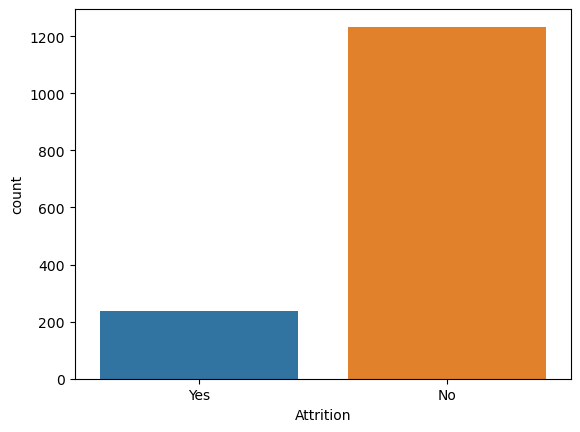

In [8]:
sns.countplot(df["Attrition"])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

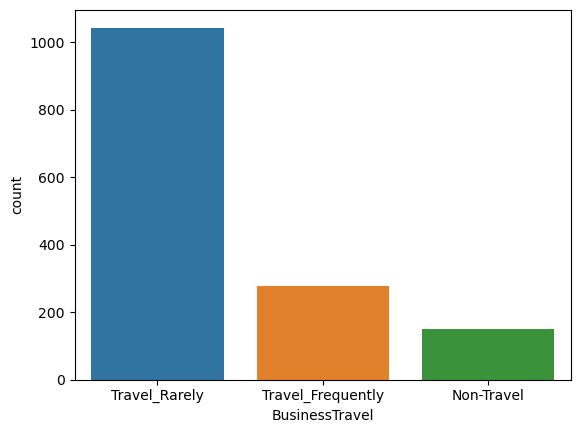

In [9]:
sns.countplot(df["BusinessTravel"])

<AxesSubplot:xlabel='Department', ylabel='count'>

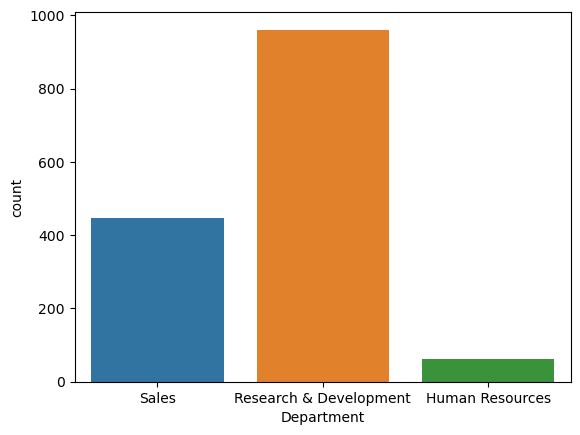

In [10]:
sns.countplot(df["Department"])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

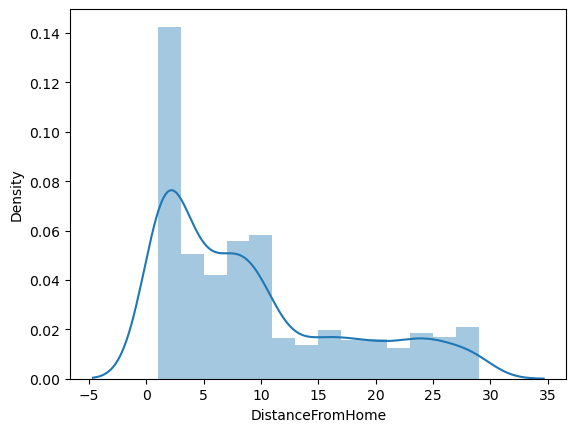

In [11]:
sns.distplot(df["DistanceFromHome"])

<AxesSubplot:xlabel='Education', ylabel='count'>

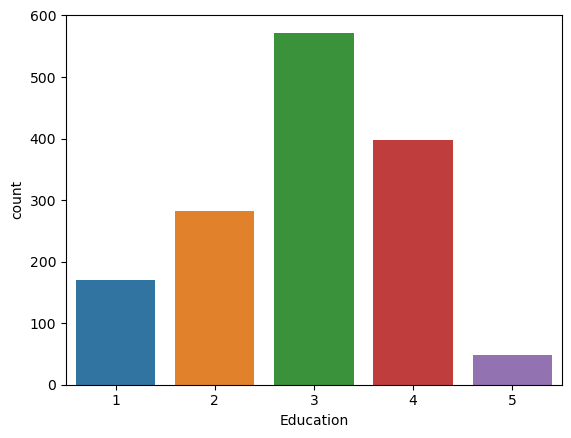

In [12]:
sns.countplot(df["Education"])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

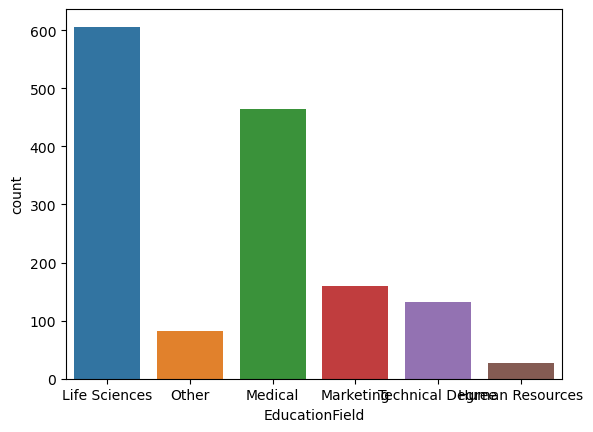

In [13]:
sns.countplot(df["EducationField"])

<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

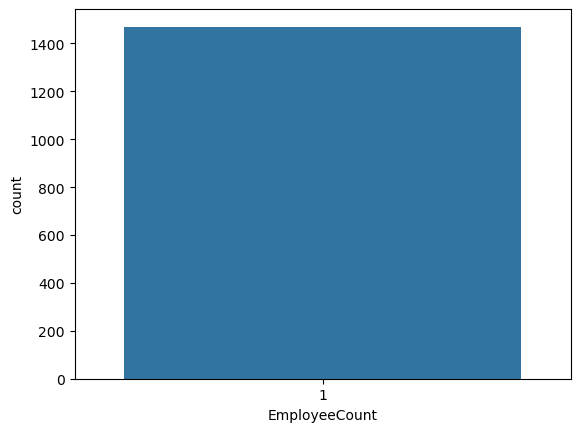

In [14]:
sns.countplot(df["EmployeeCount"])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

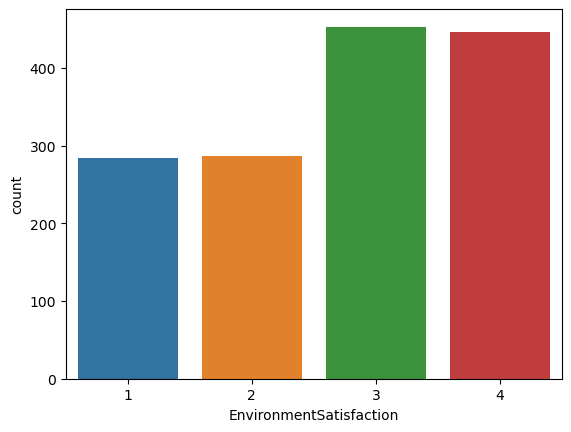

In [15]:
sns.countplot(df["EnvironmentSatisfaction"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

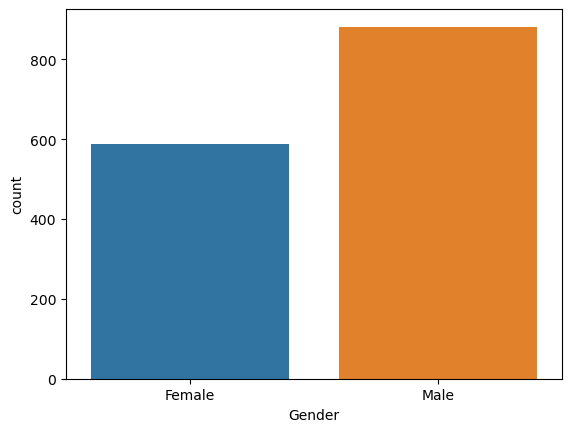

In [16]:
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

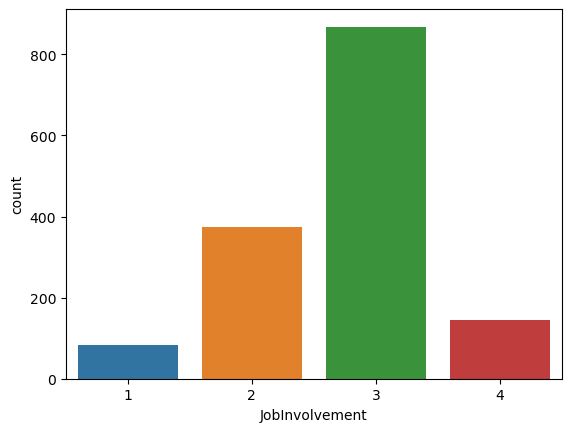

In [17]:
sns.countplot(df["JobInvolvement"])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

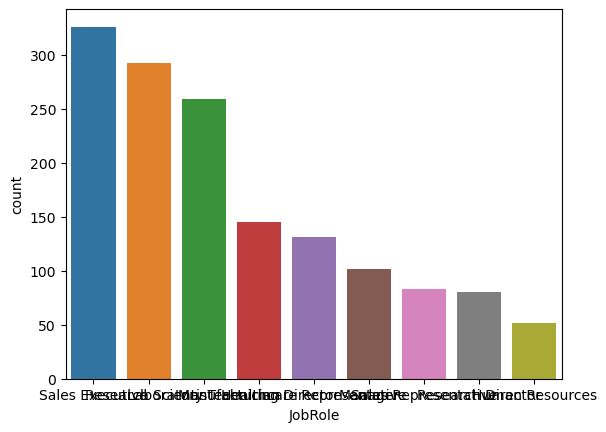

In [18]:
sns.countplot(df["JobRole"])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

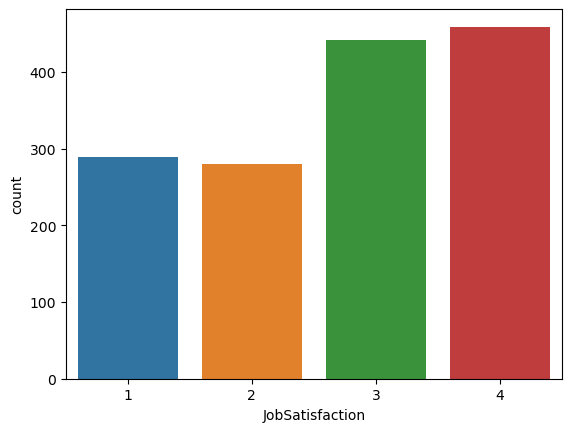

In [19]:
sns.countplot(df["JobSatisfaction"])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

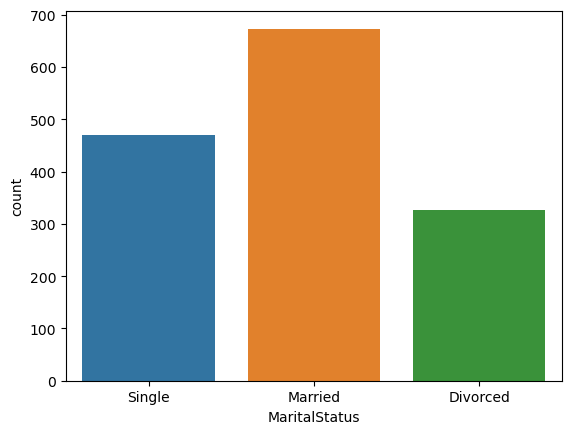

In [20]:
sns.countplot(df["MaritalStatus"])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

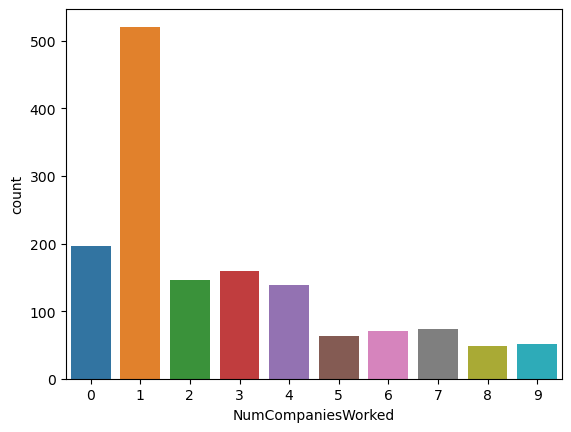

In [21]:
sns.countplot(df["NumCompaniesWorked"])

<AxesSubplot:xlabel='Over18', ylabel='count'>

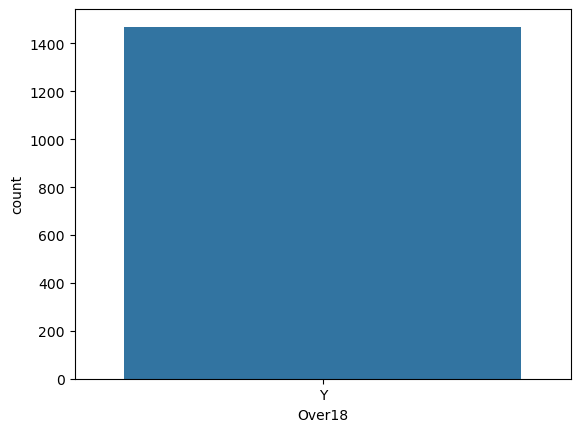

In [22]:
sns.countplot(df["Over18"])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

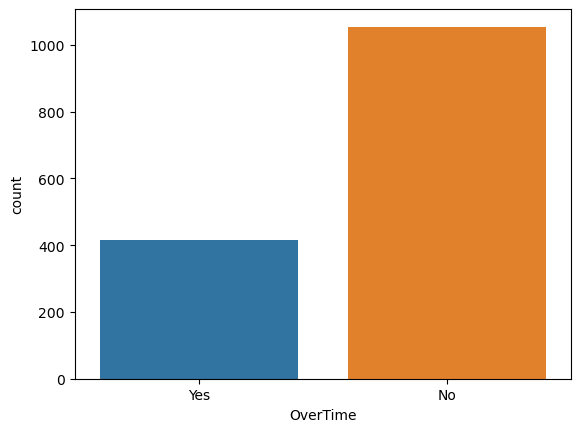

In [23]:
sns.countplot(df["OverTime"])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

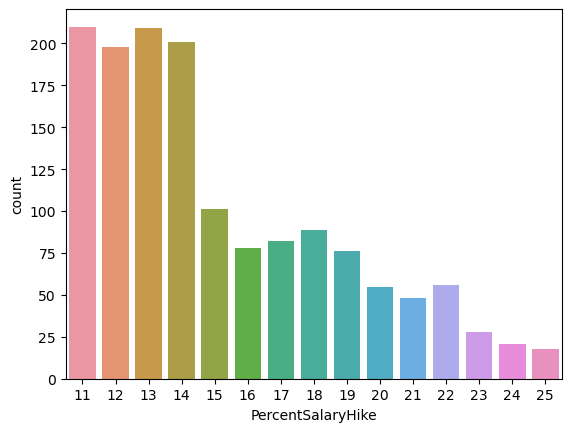

In [24]:
sns.countplot(df["PercentSalaryHike"])

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

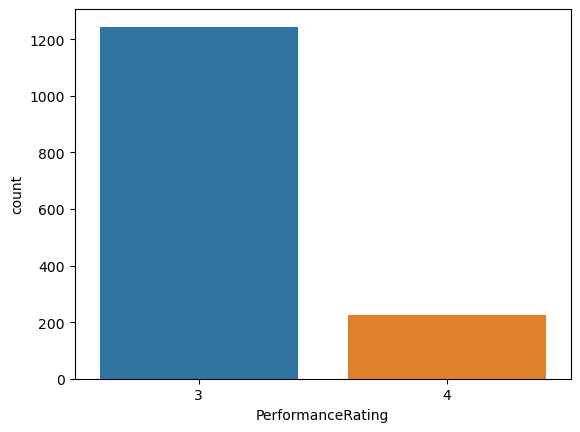

In [25]:
sns.countplot(df["PerformanceRating"])

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

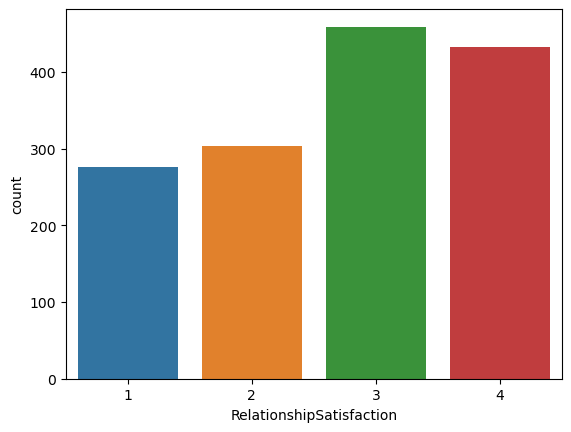

In [26]:
sns.countplot(df["RelationshipSatisfaction"])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

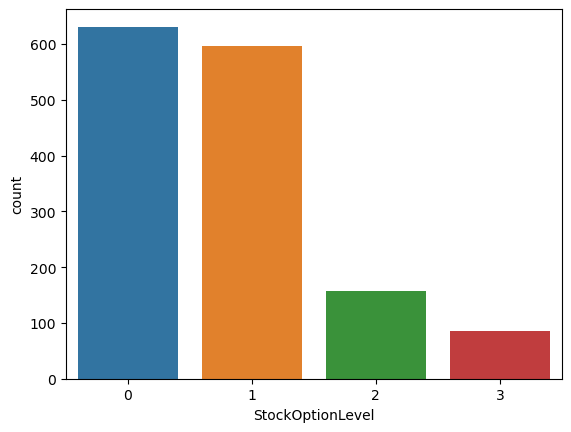

In [27]:
sns.countplot(df["StockOptionLevel"])

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

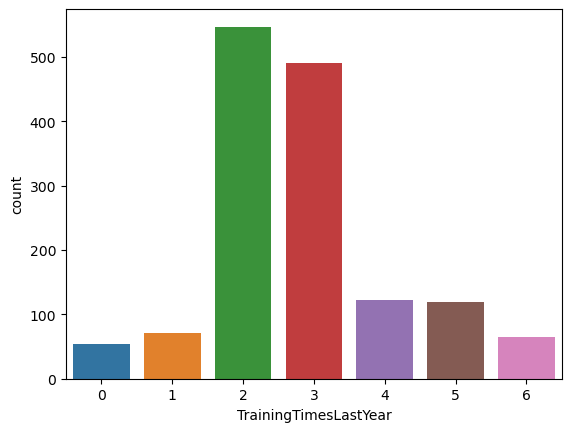

In [28]:
sns.countplot(df["TrainingTimesLastYear"])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

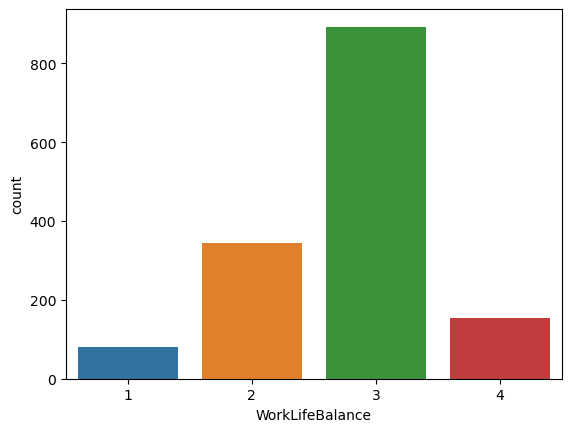

In [29]:
sns.countplot(df["WorkLifeBalance"])

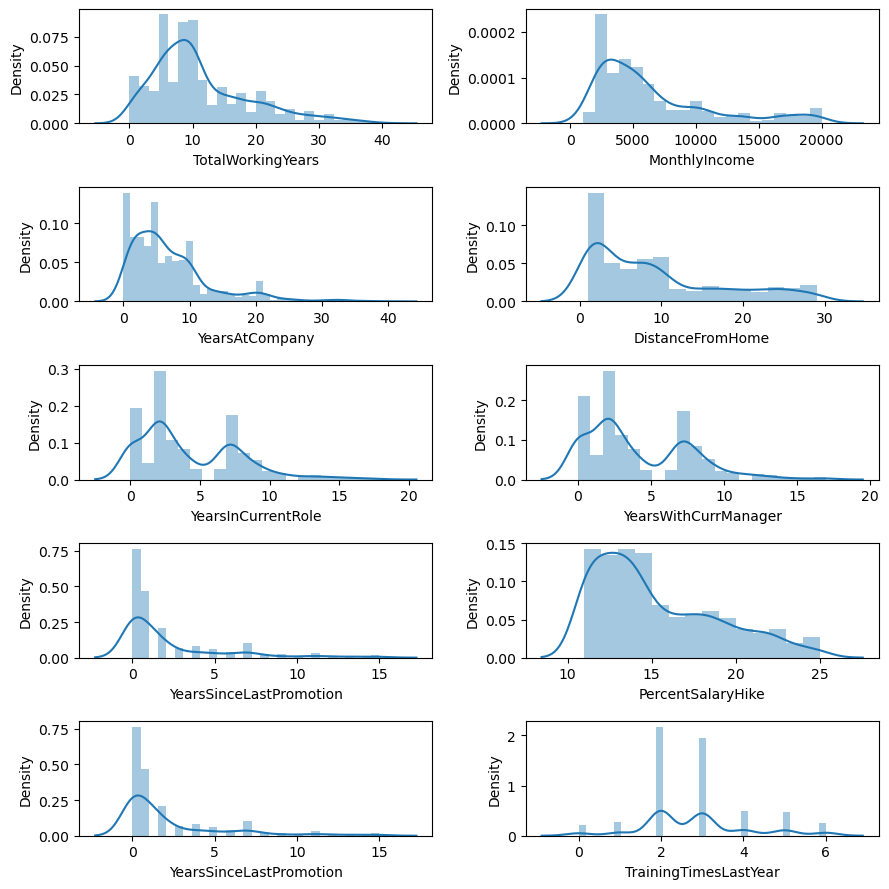

In [30]:
# Univariate Analysis

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

With the Visualization part, we compare the feature with univariate analysis.Also we compare with target variable

# Label Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime","Over18"]
for i in l:
    df[i]=le.fit_transform(df[i])

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


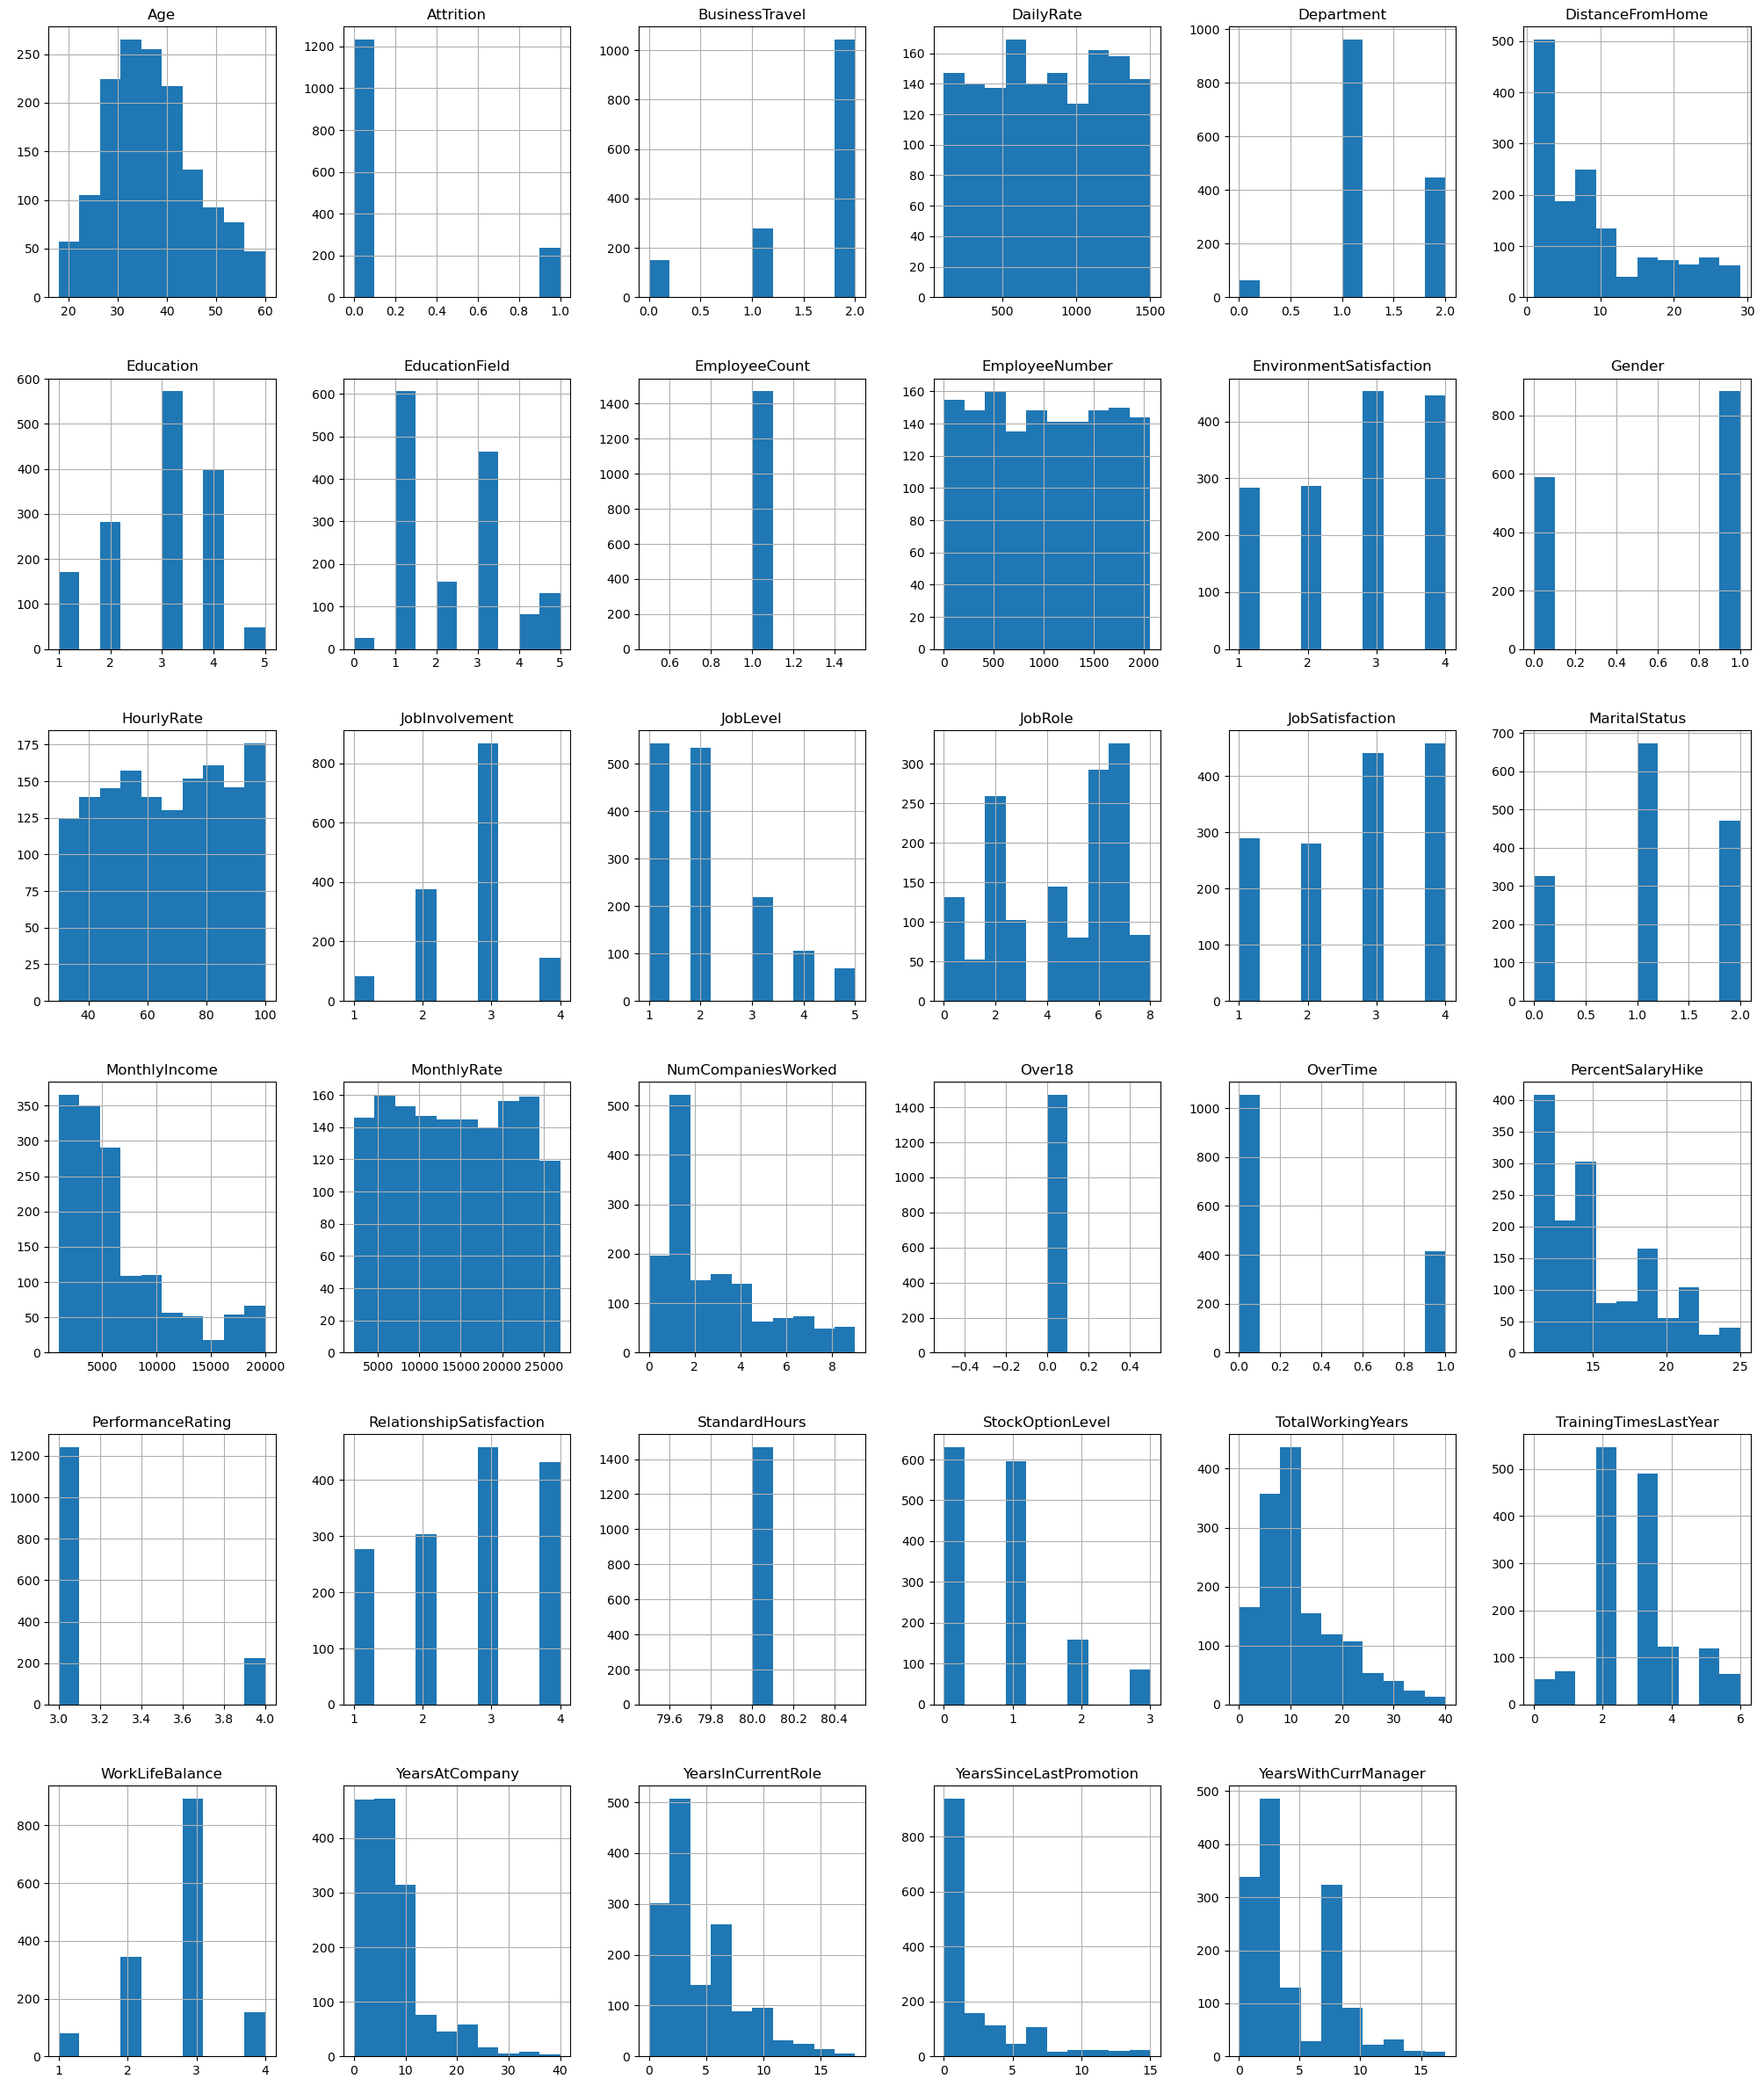

In [35]:
df.hist(figsize=(25,30))
plt.show()


# Heatmap

In [ ]:
# plt.figure(figsize=(24,14))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [37]:
df.drop(["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

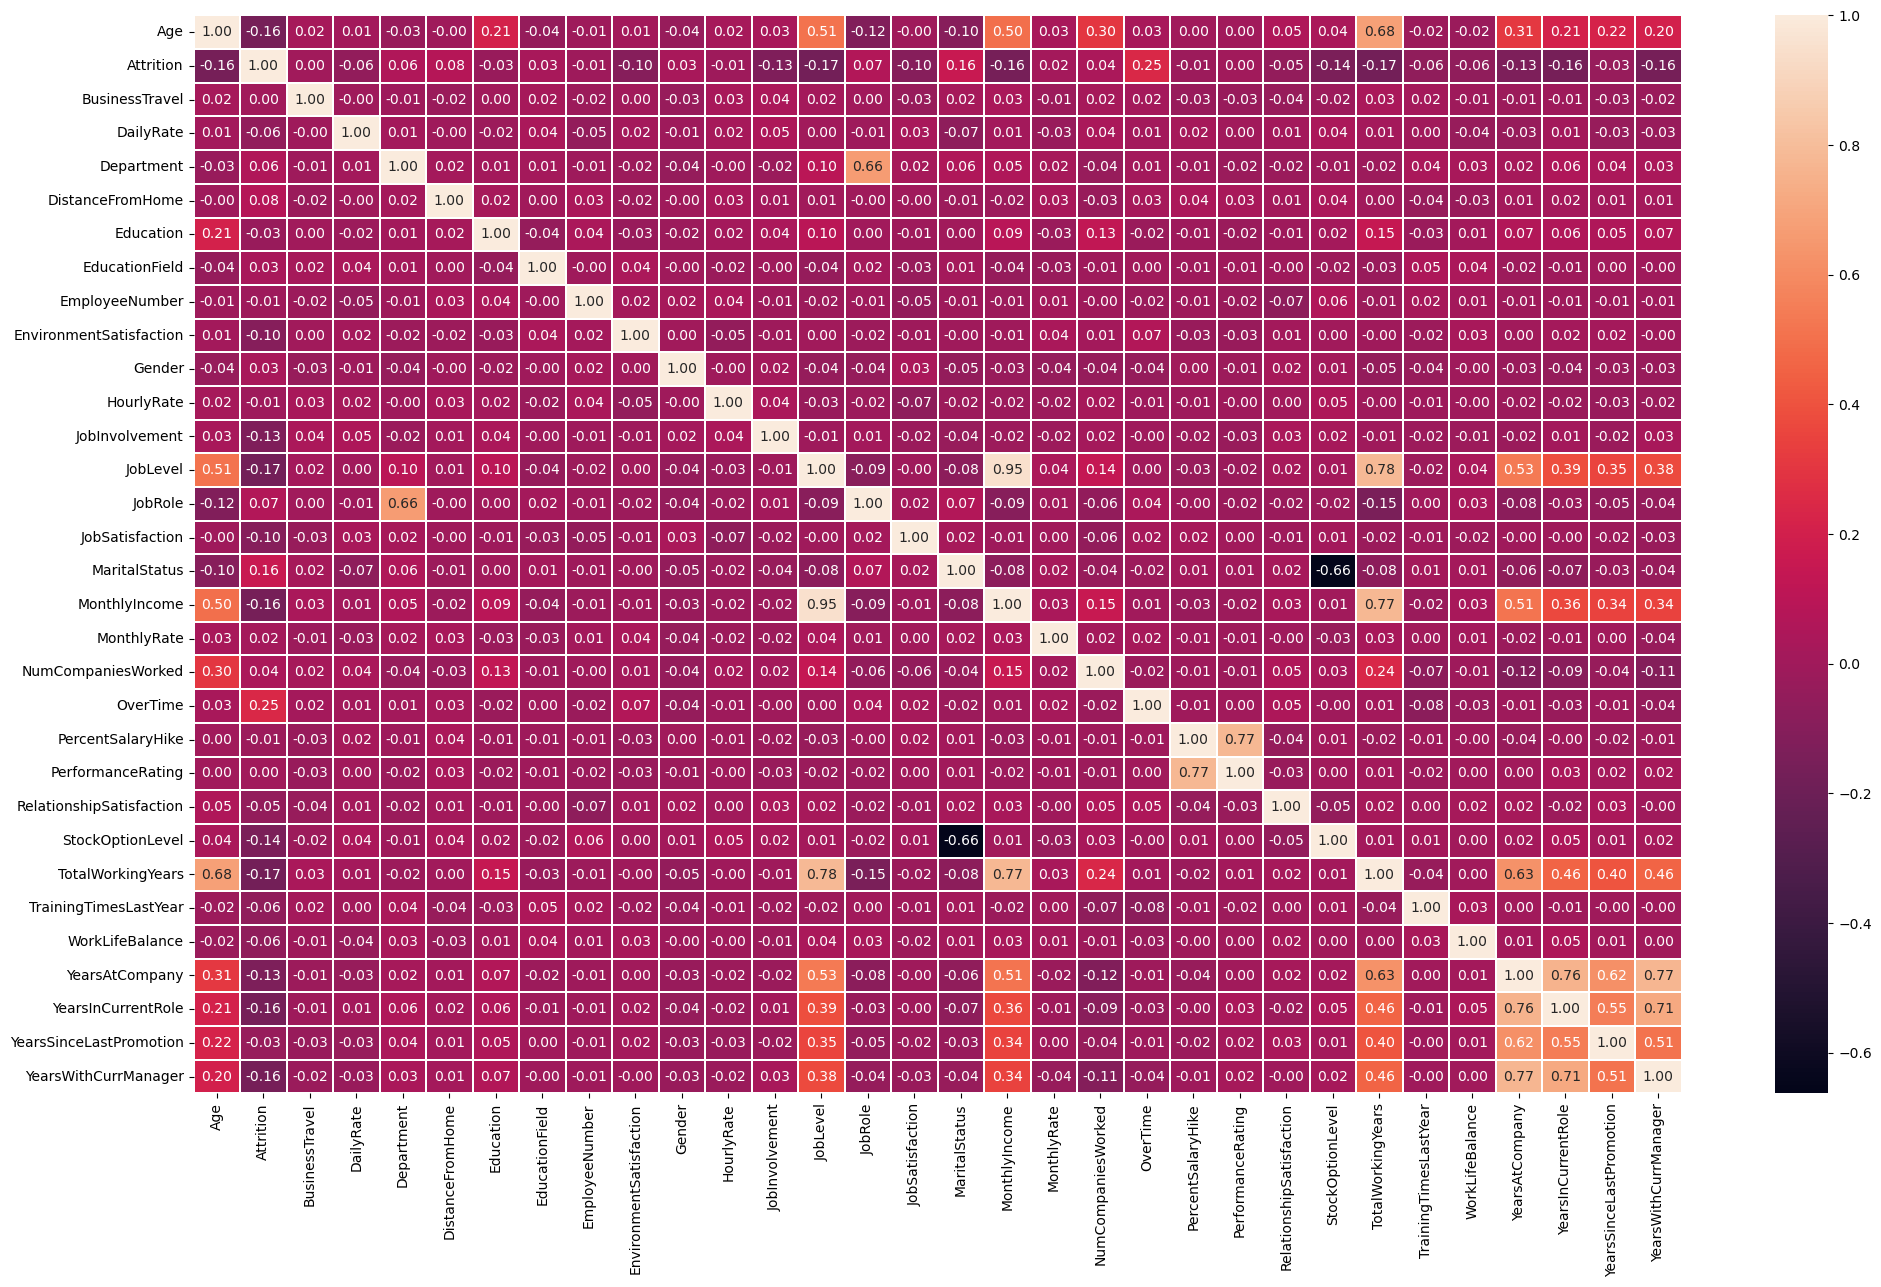

In [38]:
plt.figure(figsize=(24,14))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [39]:
df.corr()["Attrition"].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

In [40]:
df.drop(["PerformanceRating","YearsInCurrentRole"],axis=1,inplace=True)

In [41]:
df.shape

(1470, 30)

# Removing outliers

Age                            AxesSubplot(0.125,0.747241;0.110714x0.132759)
Attrition                   AxesSubplot(0.257857,0.747241;0.110714x0.132759)
BusinessTravel              AxesSubplot(0.390714,0.747241;0.110714x0.132759)
DailyRate                   AxesSubplot(0.523571,0.747241;0.110714x0.132759)
Department                  AxesSubplot(0.656429,0.747241;0.110714x0.132759)
DistanceFromHome            AxesSubplot(0.789286,0.747241;0.110714x0.132759)
Education                      AxesSubplot(0.125,0.587931;0.110714x0.132759)
EducationField              AxesSubplot(0.257857,0.587931;0.110714x0.132759)
EmployeeNumber              AxesSubplot(0.390714,0.587931;0.110714x0.132759)
EnvironmentSatisfaction     AxesSubplot(0.523571,0.587931;0.110714x0.132759)
Gender                      AxesSubplot(0.656429,0.587931;0.110714x0.132759)
HourlyRate                  AxesSubplot(0.789286,0.587931;0.110714x0.132759)
JobInvolvement                 AxesSubplot(0.125,0.428621;0.110714x0.132759)

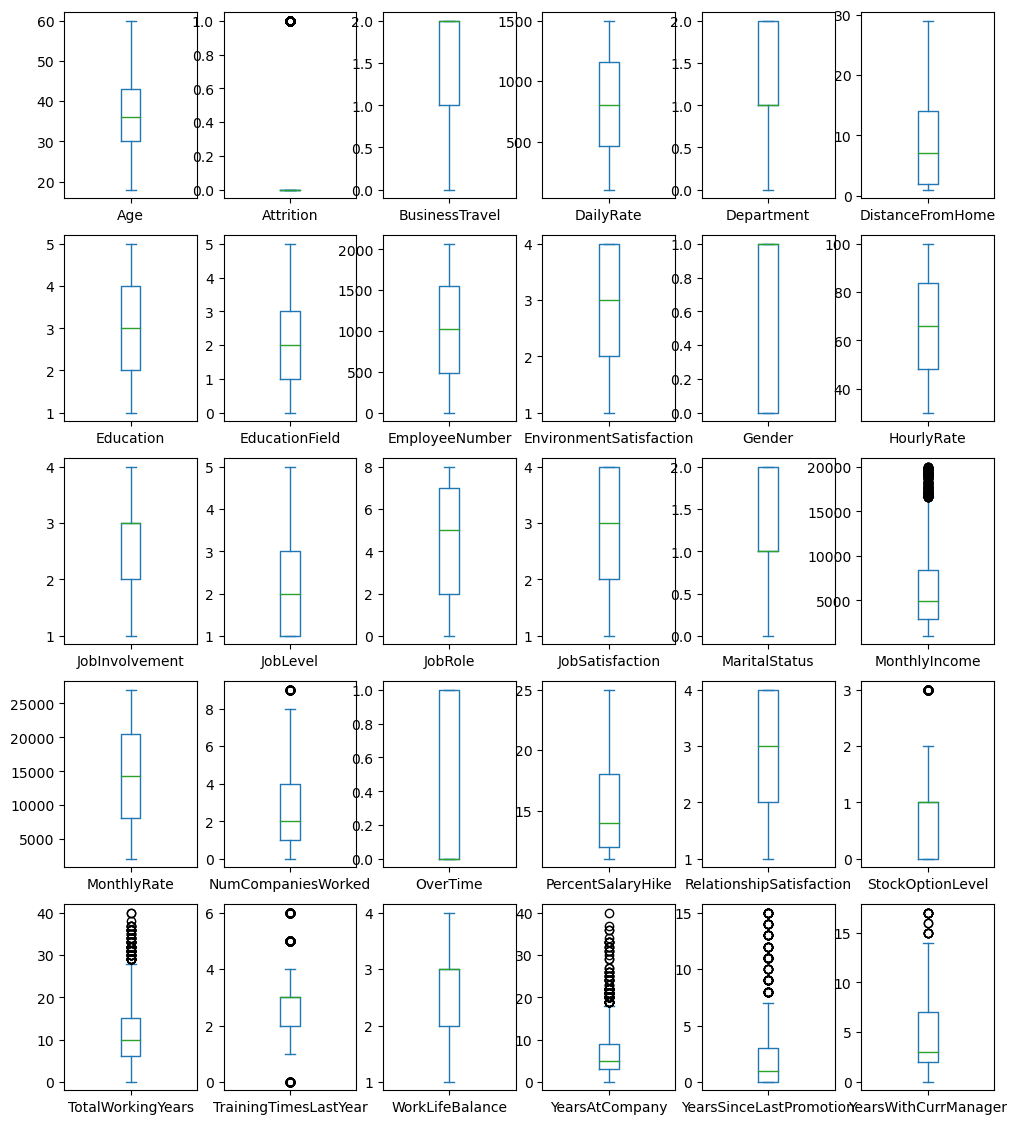

In [42]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(12,14))


In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [44]:
np.where(z>3)

(array([  28,   45,   62,   62,   64,   85,   98,   98,  110,  123,  123,
         126,  126,  126,  153,  178,  187,  187,  190,  218,  231,  237,
         237,  270,  270,  326,  386,  386,  401,  411,  425,  425,  427,
         445,  473,  477,  535,  561,  561,  584,  592,  595,  595,  595,
         616,  624,  635,  653,  653,  677,  686,  701,  749,  752,  799,
         838,  861,  861,  875,  875,  894,  914,  914,  918,  922,  926,
         926,  937,  956,  962,  976, 1008, 1043, 1078, 1078, 1086, 1086,
        1093, 1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223,
        1242, 1295, 1301, 1301, 1303, 1331, 1348, 1401, 1414], dtype=int64),
 array([29, 28, 27, 28, 28, 24, 24, 27, 28, 28, 29, 24, 27, 28, 29, 28, 24,
        29, 27, 28, 29, 27, 28, 24, 27, 28, 28, 29, 24, 27, 27, 28, 28, 24,
        27, 27, 28, 27, 29, 28, 27, 24, 27, 28, 29, 24, 29, 27, 28, 27, 29,
        28, 27, 28, 28, 28, 27, 28, 28, 29, 24, 27, 28, 27, 28, 28, 29, 28,
        24, 27, 28, 28, 24,

In [45]:
dfn=df[(z<3).all(axis=1)]

In [46]:
dfn.shape

(1396, 30)

percentage loss of data=(1470-1396)/1470*100=5%

# Minimizing the skewness

In [47]:
dfn.skew().sort_values()

BusinessTravel             -1.425472
WorkLifeBalance            -0.556652
JobInvolvement             -0.509139
Gender                     -0.406858
JobRole                    -0.390168
JobSatisfaction            -0.345527
EnvironmentSatisfaction    -0.315979
RelationshipSatisfaction   -0.290901
Education                  -0.287985
MaritalStatus              -0.156633
HourlyRate                 -0.030553
DailyRate                  -0.016078
EmployeeNumber              0.018467
MonthlyRate                 0.032477
Department                  0.183475
Age                         0.465533
EducationField              0.544560
TrainingTimesLastYear       0.578637
YearsWithCurrManager        0.680904
PercentSalaryHike           0.800660
DistanceFromHome            0.954545
StockOptionLevel            0.957525
OverTime                    0.964771
TotalWorkingYears           1.013725
NumCompaniesWorked          1.035919
JobLevel                    1.114363
YearsAtCompany              1.252927
M

In [48]:
list=["BusinessTravel","OverTime","TotalWorkingYears","NumCompaniesWorked","JobLevel","YearsAtCompany","MonthlyIncome","YearsSinceLastPromotion"]
for i in list:
    dfn[i]=np.log1p(dfn[i])

In [49]:
dfn.skew().sort_values()

BusinessTravel             -1.801164
TotalWorkingYears          -0.725349
WorkLifeBalance            -0.556652
JobInvolvement             -0.509139
Gender                     -0.406858
JobRole                    -0.390168
YearsAtCompany             -0.364838
JobSatisfaction            -0.345527
EnvironmentSatisfaction    -0.315979
RelationshipSatisfaction   -0.290901
Education                  -0.287985
MaritalStatus              -0.156633
HourlyRate                 -0.030553
DailyRate                  -0.016078
EmployeeNumber              0.018467
MonthlyRate                 0.032477
NumCompaniesWorked          0.098689
Department                  0.183475
MonthlyIncome               0.317588
Age                         0.465533
JobLevel                    0.491805
EducationField              0.544560
TrainingTimesLastYear       0.578637
YearsWithCurrManager        0.680904
YearsSinceLastPromotion     0.688427
PercentSalaryHike           0.800660
DistanceFromHome            0.954545
S

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [51]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,11,1,0,8,0,1,6,0,5
1,49,0,1,279,1,8,1,1,2,3,...,0,23,4,1,10,3,3,10,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,1,15,2,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,1,11,3,0,8,3,3,8,3,0
4,27,0,2,591,1,2,1,3,7,1,...,0,12,4,1,6,3,3,2,2,2


# Splitting feature and target

In [52]:
x=dfn.drop(["Attrition"],axis=1)
y=dfn["Attrition"]

In [53]:
dfx=sc.fit_transform(x)

In [54]:
dfx.mean()

-6.230675605049787e-17

# Model Building 

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8353221957040573  on Random_state  139


In [56]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=185)

In [57]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1186,35,0.693147,880,2,12,4,4,1667,4,1,...,0.693147,24,1,0,2.639057,2,4,2.484907,1.945910,7
1027,34,1.098612,401,1,1,3,1,1447,4,0,...,0.000000,17,1,1,2.079442,2,2,1.791759,0.000000,2
174,45,1.098612,1268,2,4,2,1,240,3,0,...,0.693147,11,1,1,2.302585,3,4,1.791759,0.000000,3
122,56,1.098612,441,1,14,4,1,161,2,0,...,0.693147,18,1,3,2.079442,2,3,1.791759,1.609438,3
1131,34,0.693147,653,1,10,4,5,1597,4,1,...,0.000000,14,2,1,2.197225,3,2,2.197225,2.079442,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,26,0.000000,265,2,29,2,3,1037,2,1,...,0.000000,18,4,0,2.079442,6,3,1.098612,1.098612,2
797,26,1.098612,1330,1,21,3,3,1107,1,1,...,0.000000,20,3,1,0.693147,0,2,0.693147,0.000000,0
130,43,0.693147,957,1,28,3,3,171,2,0,...,0.000000,12,4,0,2.944439,2,3,1.386294,0.693147,2
877,46,1.098612,150,1,2,4,5,1228,4,1,...,0.000000,11,3,1,2.564949,3,2,1.945910,0.693147,4


In [58]:
y_train

1186    1
1027    0
174     0
122     1
1131    0
       ..
748     1
797     1
130     0
877     0
1352    0
Name: Attrition, Length: 1116, dtype: int32

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.75
[[195  37]
 [ 33  15]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       232
           1       0.29      0.31      0.30        48

    accuracy                           0.75       280
   macro avg       0.57      0.58      0.57       280
weighted avg       0.76      0.75      0.75       280



In [60]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8285714285714286
[[232   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       232
           1       0.00      0.00      0.00        48

    accuracy                           0.83       280
   macro avg       0.41      0.50      0.45       280
weighted avg       0.69      0.83      0.75       280



In [61]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8464285714285714
[[230   2]
 [ 41   7]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       232
           1       0.78      0.15      0.25        48

    accuracy                           0.85       280
   macro avg       0.81      0.57      0.58       280
weighted avg       0.84      0.85      0.80       280



In [62]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8285714285714286
[[232   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       232
           1       0.00      0.00      0.00        48

    accuracy                           0.83       280
   macro avg       0.41      0.50      0.45       280
weighted avg       0.69      0.83      0.75       280



In [63]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7829518689196109


In [64]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8538735279057859


In [65]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.8402560163850487


In [66]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8359600614439324


In [67]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [70]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

In [71]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [72]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'random'}

In [73]:
GSCV.best_score_

0.8476737668161434

From this we conclude Decsion Tree classifier predicts well and gives best score of 84%

In [74]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 79.28571428571428


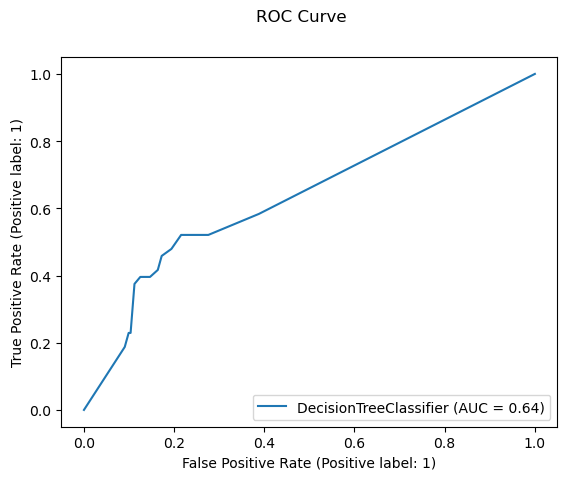

In [76]:
disp = metrics.plot_roc_curve(Final_Model,x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Saving the Model

In [81]:
import pickle
filename="HR analytics.pkl"
pickle.dump(Final_Model,open(filename,'wb'))